In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python

## Image preprocessing

Fundus images are preprocessed using OpenCV, such that the following operations are applied:
1. rescale the images to have the same radius (300 pixels or 500 pixels),
2. subtracted the local average color; the local average gets mapped to 50% gray,
3. clipped the images to 90% size to remove the boundary effects.

This was intended to remove some of the variation between images due to differing lighting conditions, camera resolution, etc.

In [ ]:
#Preprocess training images.
#Scale 300 seems to be sufficient; 500 and 1000 are overkill
import cv2, glob, numpy

def scaleRadius(img,scale):
    x=img[int(img.shape[0]/2),:,:].sum(1)
    r=(x>x.mean()/10).sum()/2
    s=scale*1.0/r
    return cv2.resize(img,(0,0),fx=s,fy=s) # img.size-number of px; fx,fy-scale factors, (0,0)-desired size for the output image?

for scale in [300]:
    for f in (glob.glob("drive/My Drive/Pattern Recognition/train_DR/*.jpeg")):
        
            a=cv2.imread(f)
         #scale img to given radius
            a=scaleRadius(a,scale)
            a=cv2.addWeighted(a,4,cv2.GaussianBlur(a,(0,0),scale/30),-4,128) #alpha blending of 2 imgs with OpenCV, blur for smoothing           
         #remove outer 10%
            b=numpy.zeros(a.shape)
            cv2.circle(b,(int(a.shape[1]/2),int(a.shape[0]/2)),int(scale*0.9),(1,1,1),-1,8,0) #circle over image
         #sutract local mean color
            #a=a*b+128*(1-b) #without this line, the visualization is better
            
            b = cv2.normalize(b.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
            a = cv2.normalize(a.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
            a = a*b+0.5*(1-b)
            a = cv2.convertScaleAbs(a, alpha=255.0)
            
            print("drive/My Drive/Pattern Recognition/train_DR_prepr/scale_" + str(scale) + "/" + f[44:-5]  + "_p.jpeg")
            cv2.imwrite(("drive/My Drive/Pattern Recognition/train_DR_prepr/scale_" + str(scale) + "/" + f[44:-5]  + "_p.jpeg" ),a)
        


drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/1347_left_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/1347_right_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13473_left_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13473_right_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13481_left_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13481_right_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13482_left_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13482_right_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13486_left_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13485_left_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13486_right_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/13488_left_p.jpeg
drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300/1

In [ ]:
!ls "drive/My Drive/Pattern Recognition/train_DR_prepr/scale_300"

10_left_p.jpeg	 13_right_p.jpeg  16_left_p.jpeg   17_right_p.jpeg
10_right_p.jpeg  15_left_p.jpeg   16_right_p.jpeg
13_left_p.jpeg	 15_right_p.jpeg  17_left_p.jpeg


In [ ]:
#Preprocess testing images.
#Scale 300 seems to be sufficient; 500 and 1000 are overkill
import cv2, glob, numpy

cnt = 0

def scaleRadius(img,scale):
    x=img[int(img.shape[0]/2),:,:].sum(1)
    r=(x>x.mean()/10).sum()/2
    s=scale*1.0/r
    return cv2.resize(img,(0,0),fx=s,fy=s) # img.size-number of px; fx,fy-scale factors, (0,0)-desired size for the output image?

for scale in [300]:
    for f in (glob.glob("drive/My Drive/Pattern Recognition/test_DR/*.jpeg")):
        
            a=cv2.imread(f)
         #scale img to given radius
            a=scaleRadius(a,scale)
            a=cv2.addWeighted(a,4,cv2.GaussianBlur(a,(0,0),scale/30),-4,128) #alpha blending of 2 imgs with OpenCV, blur for smoothing           
         #remove outer 10%
            b=numpy.zeros(a.shape)
            cv2.circle(b,(int(a.shape[1]/2),int(a.shape[0]/2)),int(scale*0.9),(1,1,1),-1,8,0) #circle over image
         #sutract local mean color
            #a=a*b+128*(1-b) #without this line, the visualization is better
            
            b = cv2.normalize(b.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
            a = cv2.normalize(a.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
            a = a*b+0.5*(1-b)
            a = cv2.convertScaleAbs(a, alpha=255.0)

           
            print("drive/My Drive/Pattern Recognition/test_DR_prepr/scale_" + str(scale) + "/" + f[43:-5]  + "_p.jpeg")
            cv2.imwrite(("drive/My Drive/Pattern Recognition/test_DR_prepr/scale_" + str(scale) + "/" + f[43:-5]  + "_p.jpeg" ),a)
            cnt += 1
            print(cnt)
        


drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19503_left_p.jpeg
1
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19503_right_p.jpeg
2
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19507_left_p.jpeg
3
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19507_right_p.jpeg
4
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19510_right_p.jpeg
5
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19510_left_p.jpeg
6
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19518_left_p.jpeg
7
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19518_right_p.jpeg
8
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19520_right_p.jpeg
9
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19525_left_p.jpeg
10
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19525_right_p.jpeg
11
drive/My Drive/Pattern Recognition/test_DR_prepr/scale_300/19535_left_p.jpeg
12
drive/My Drive/Pattern Recognition/test_DR_

## Resulting images after the preprocessing

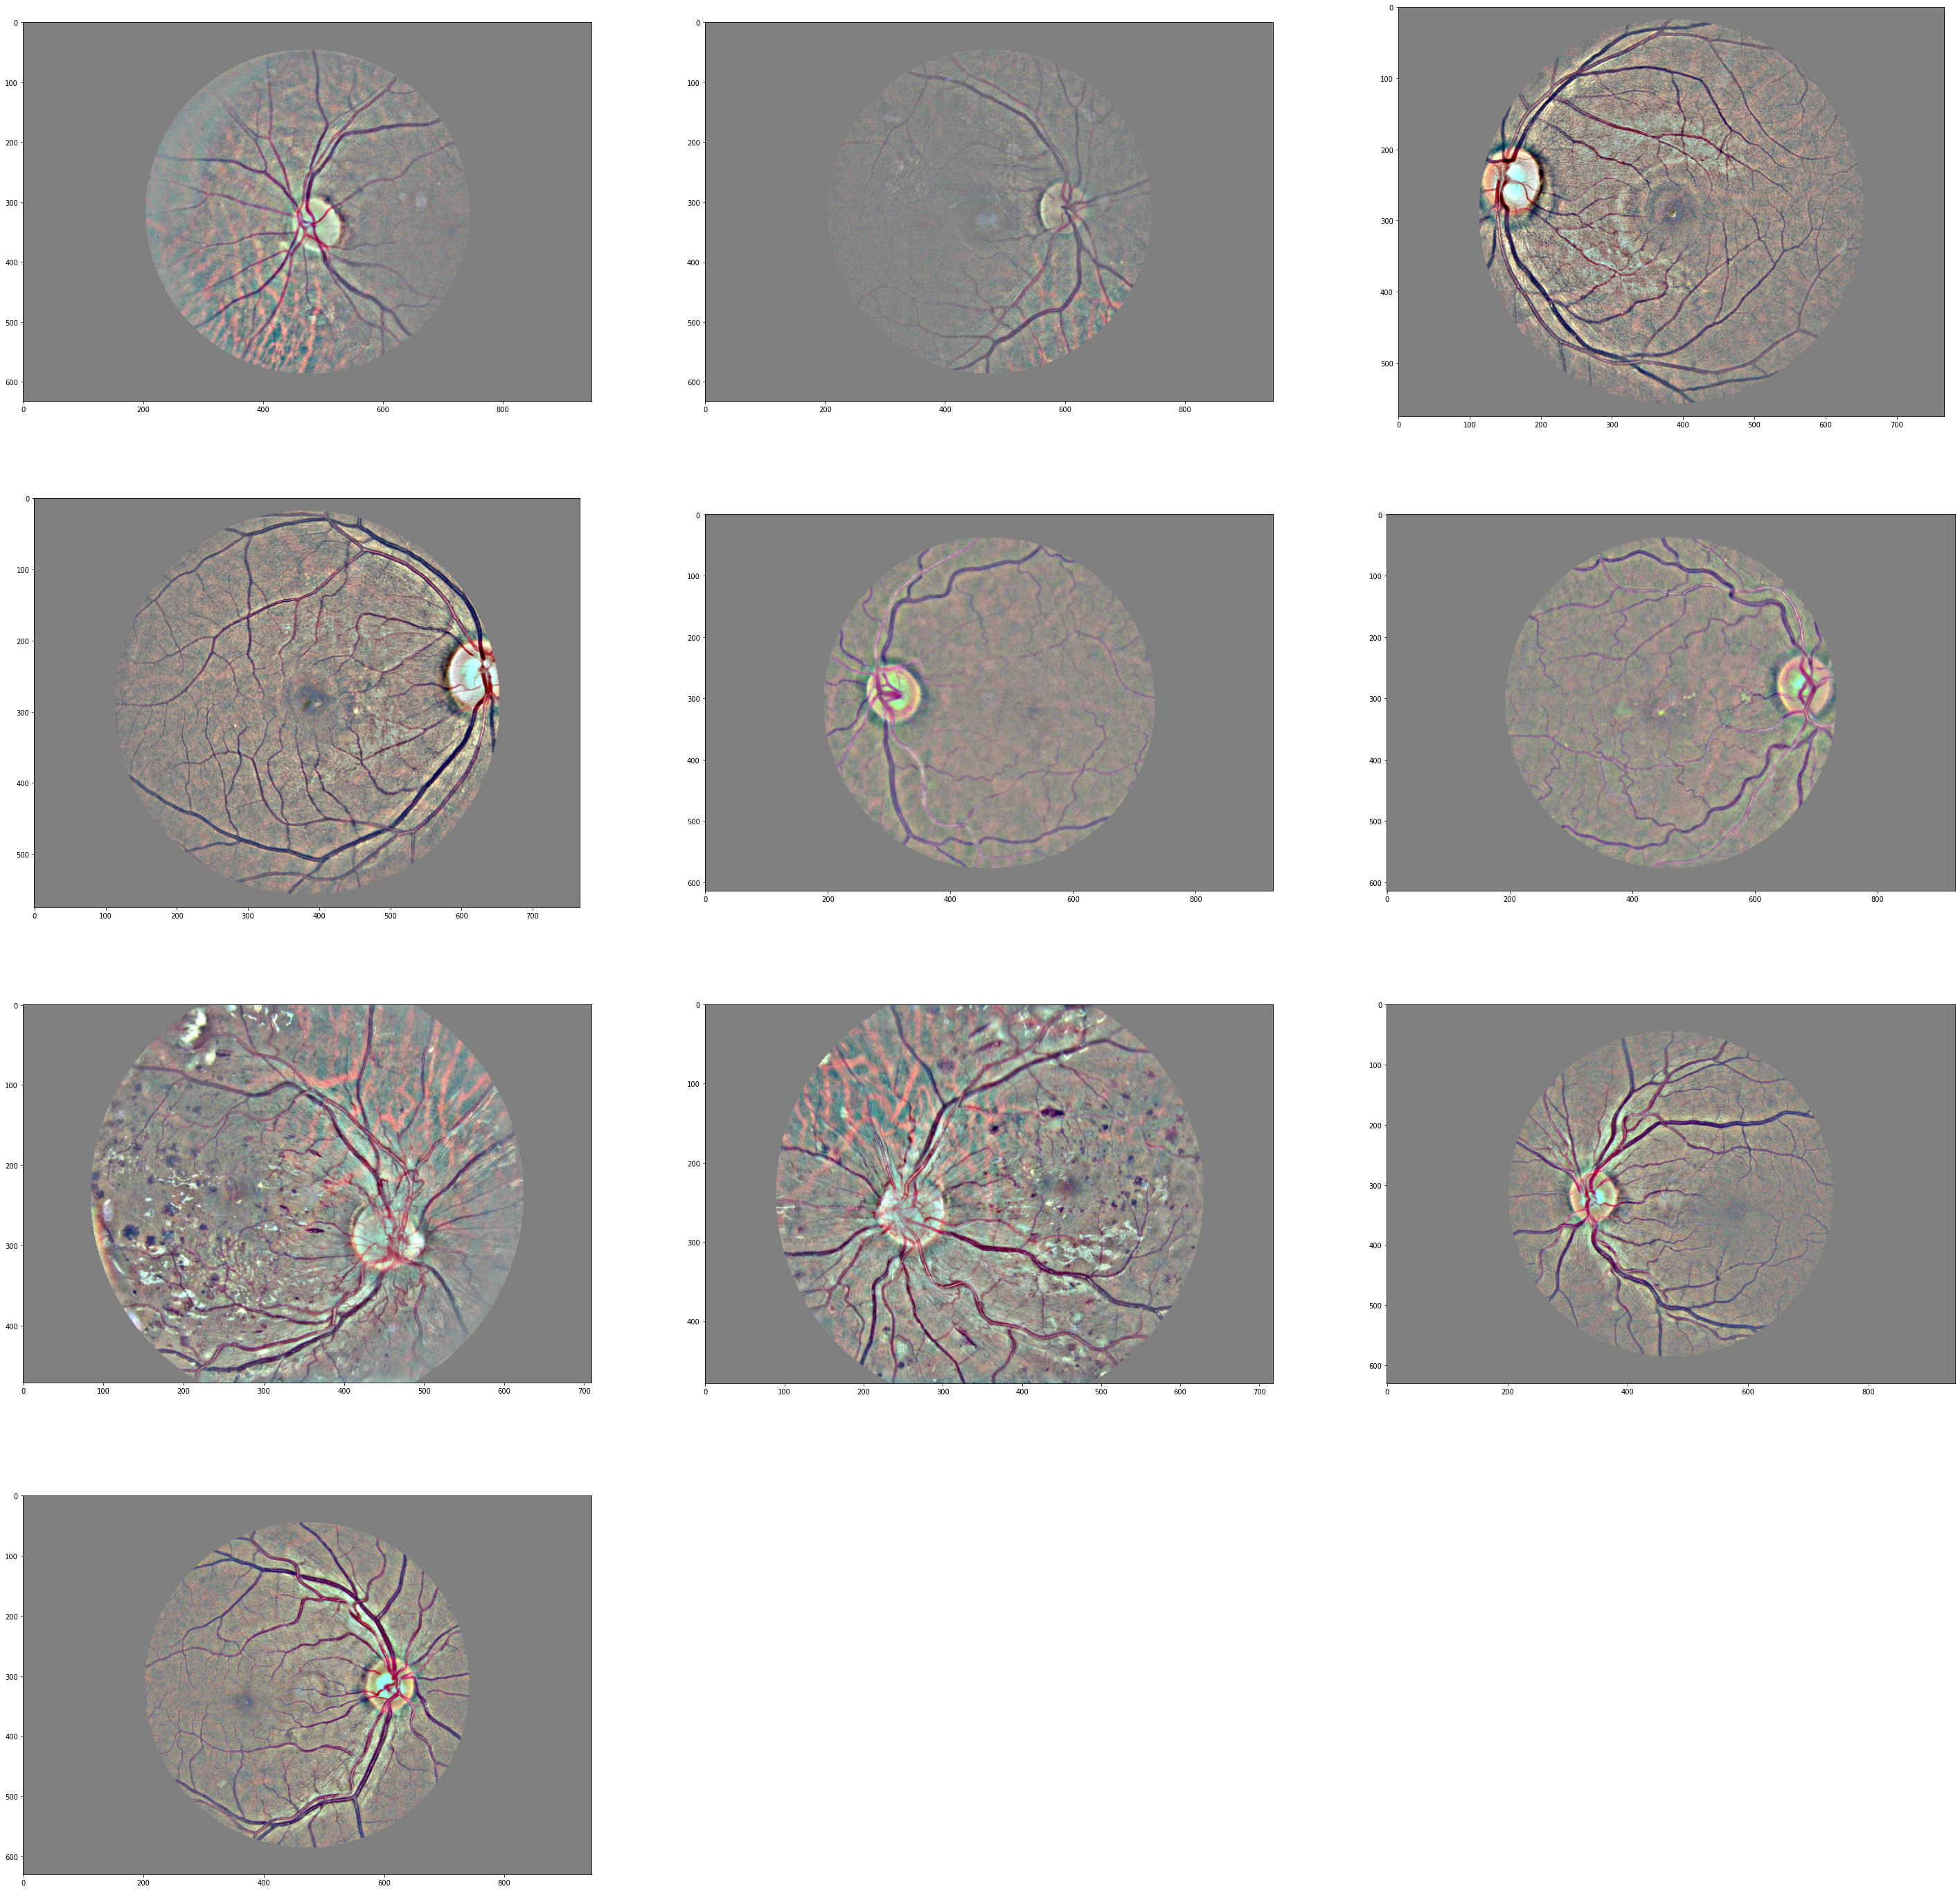

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob("drive/My Drive/Pattern Recognition/sample_prepr/scale_300/*.jpeg"):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(50,50))
columns = 3
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)